# 5.5. Hashing

** 하나의 문자열을 보다 빨리 찾을 수 있도록 주소에 직접 접근할 수 있는 짧은 길이의 값이나 키로 변환하는 것 **. 문자열을 찾을 때 문자 하나하나를 비교하며 찾는 것보다는 문자열에서 해시 키를 계산하고 그 키에 해당하는 장소에 문자열을 저장해 둔다면, 찾을 때는 한 번의 해시 키 계산만으로도 쉽게 찾을 수 있게 된다. 해싱은 기본적으로 데이터를 흩뜨려 놓는 성질이 있기 때문에 메모리를 많이 차지하는 단점은 있으나 빠른 검색과 원문과 상관없는 비화된 문자열의 특성이 있어 전자 서명 알고리듬에서 암호화 및 복호화에도 사용된다.
<br/>[네이버 지식백과] 해싱 [hashing] (IT용어사전, 한국정보통신기술협회)

해싱의 목적은 시간 복잡도가 1이 되게 하는것 하지만 불가능 

+ 아래는 빈 해쉬 테이블로 각각의 위치를 슬롯
+ 0에서 10번 슬롯이 생성
+ 처음에는 할당된 항목이 없어 None으로 초기화
+ 슬롯의 갯수를 m이라고 하면 슬롯은 0 ~ m-1의 생성 된다 
** 아래는 m=11 슬롯 번호는 0~ 11-1 -> 0~10 **

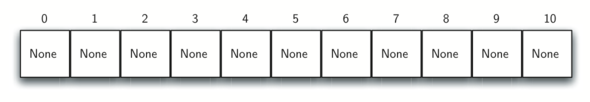


### remainder method

+ 아이템들을 슬롯에 맵핑 시키는걸 hash function 
+ 아래의 표는 remainder metthod 를 사용해서 매핑
+ 일반적으로 모든 해시 함수에서 활용

### hash value = item%m


Item| Hash Value
--- | --- 
54 | 10
26 | 4
93 | 5
17 | 6
77 | 0
31 | 9
+ 11개의 슬롯중 6개 점유
+ 부하계수(load factor)
+ 점유개수/총 슬롯개수 -> 6/11
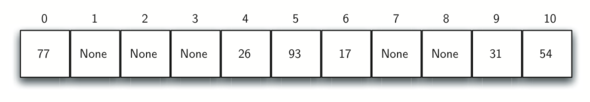

+ 위의 방법을 쓰면 44 항목을 할당 할려면 77 항목과 충돌(** collision**)이 발생




# 5.5.1. Hash Functions

Given a collection of items, a hash function that maps each item into a unique slot is referred to as a perfect hash function. <br/>
Unfortunately, given an arbitrary collection of items, there is no systematic way to construct a perfect hash function. <br/>
One way to always have a perfect hash function is to increase the size of the hash table so that each possible value in the item range can be accommodated. <br/>
Our goal is to create a hash function that minimizes the number of collisions, is easy to compute, and evenly distributes the items in the hash table.<br/>

### The folding method
- 항목을 같은 자리수로 분해
- 분해 항목들을 더한다
- 더한 값을 해시 테이블 수로 나눈 나머지가 슬롯 번호이다

EX> 436-555-4601 -> 43 + 65 + 55 + 46 + 01 -> 210 % 11 = 1

### mid-square method
- 값을 제곱한다
- 제곱값의 중앙 자리의 수를 해시 테이블 수로 나눈다
- 나머지가 슬롯번호

EX> 54**2= 2916 -> 91%11 = 3


Item| Remainder | Mid-Square
--- | --- | ---
54 | 10 | 3
26 | 4 | 7
93 | 5 | 9
17 | 6 | 8
77 | 0 | 4
31 | 9 | 6

문자열도 같은 방식으로 할 수 있다.


In [5]:
print(ord('c'))

print(ord('a'))

print(ord('t'))


99
97
116


99 + 97 + 116 = 312 -> 312 % 11 -> 4

+ 아나그램의 경우 다 같은 값이 나옴
+ 그래서 위치에 따라 가중치를 줘서 계산

99 * 1 + 97 * 2 + 116 * 3 = 641 -> 641 % 11 = 3

** 해시 값을 계산하는 여러가지 방법이 있을수 있지만 계산 식이 복잡하면 순차 검색이나 이진 검색을 수행하는거 보다 효율이 떨어져 해시의 목적에서 멀어짐 **


# 5.5.2. Collision Resolution

+ 두항목이 같은 슬롯에 배치 될때를 충돌(Collision)
+ 이때 충돌 항목중 하나를 빈 슬롯에 배치하는 체계적인 방법을 충돌 해결(Collision Resolution)


### open addressing
- 충돌이 발생한 슬롯부터 빈 슬롯이 나올때 까지 순차적으로 검색
- linear probing 이라고도 함

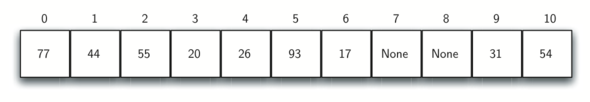

- linear probing 단점은 클리스터링이 발생함
- 뒤에 해싱되는 항목에 영향을 미침

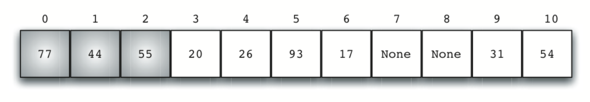

- 클러스터 해결 방법으로 순차적 검색이 아닌 단계별 검색
- 아래는 3단계식 넘어가면서 빈 슬롯 탐색

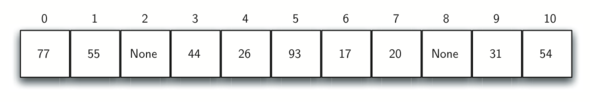

### rehashing

+ rehash(pos)=(pos+skip)%sizeoftablerehash
+ 스킵 값은 모든 슬롯을 다 돌수 있어야 한다.
+ 해쉬 테이블의 크기는 소수로 하는게 좋다

### quadratic probing
+ skip 값 대신 1,3,5,7,9,등으로 증가 시키는 rehash 함수 사용
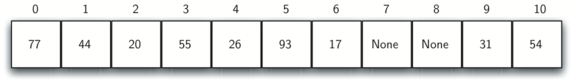

### Chaining 
- 항목 모음에 대한 참조를 할수있어 한 슬롯에 여러개의 항목이 존재 가능
- 같은 슬롯에 많은 항목이 배치 되면 검색에 어려움이 커진다
- 슬롯 마다 콜렉션이 있어 검색 기술을 사용하여 검색
- 각 슬롯마다 평균적으로 아이템이 적게 있어 검색이 효율적일 수 있다.
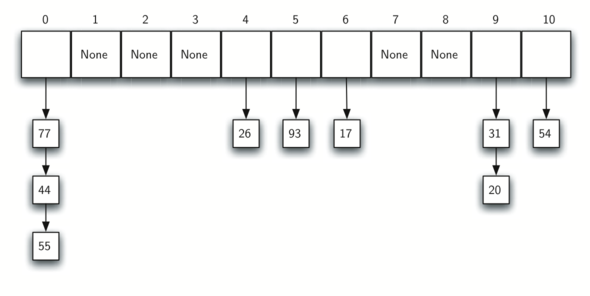


# 5.5.3. Implementing the Map Abstract Data Type


In [20]:
class HashTable:
    def __init__(self):
        self.size = 11
        self.slots = [None] * self.size
        self.data = [None] * self.size
        
    def put(self,key,data):
      hashvalue = self.hashfunction(key,len(self.slots))

      if self.slots[hashvalue] == None:
        self.slots[hashvalue] = key
        self.data[hashvalue] = data
      else:
        if self.slots[hashvalue] == key:
          self.data[hashvalue] = data  #replace
        else:
          nextslot = self.rehash(hashvalue,len(self.slots))
          while self.slots[nextslot] != None and \
                          self.slots[nextslot] != key:
            nextslot = self.rehash(nextslot,len(self.slots))

          if self.slots[nextslot] == None:
            self.slots[nextslot]=key
            self.data[nextslot]=data
          else:
            self.data[nextslot] = data #replace

    def hashfunction(self,key,size):
         return key%size

    def rehash(self,oldhash,size):
        return (oldhash+1)%size
    def get(self,key):
      startslot = self.hashfunction(key,len(self.slots))

      data = None
      stop = False
      found = False
      position = startslot
      while self.slots[position] != None and  \
                           not found and not stop:
         if self.slots[position] == key:
           found = True
           data = self.data[position]
         else:
           position=self.rehash(position,len(self.slots))
           if position == startslot:
               stop = True
      return data

    def __getitem__(self,key):
        return self.get(key)

    def __setitem__(self,key,data):
        self.put(key,data)

In [21]:
H=HashTable()
H[54]="cat"
H[26]="dog"
H[93]="lion"
H[17]="tiger"
H[77]="bird"
H[31]="cow"
H[44]="goat"
H[55]="pig"
H[20]="chicken"
H.slots
[77, 44, 55, 20, 26, 93, 17, None, None, 31, 54]
H.data
['bird', 'goat', 'pig', 'chicken', 'dog', 'lion',
       'tiger', None, None, 'cow', 'cat']

['bird',
 'goat',
 'pig',
 'chicken',
 'dog',
 'lion',
 'tiger',
 None,
 None,
 'cow',
 'cat']

In [23]:
H[20]
'chicken'
H[17]
'tiger'
H[20]='duck'
H[20]
'duck'
H.data
['bird', 'goat', 'pig', 'duck', 'dog', 'lion',
       'tiger', None, None, 'cow', 'cat']
print(H[99])
None

None


In [33]:
 def readTableSize():
     while True:
         tsize = input("Enter table size: ")
         if isinstance(tsize, int):
              return tsize
            
         tsize = tsize.strip()
         if not tsize.isdigit():
            print ("Bad table size - please input integer values")
            continue
         tsize = int(tsize)
         return tsize
 
 
 def readString():
     string = input("Enter string: ")
     string = string.strip()
     return string
 
 
 def hash(string, tableSize):
     totalSum = 0
     for index in range(len(string)):
         totalSum += ord(string[index])
     # print ("Total Ordinal Sum: ", totalSum)
     return totalSum % tableSize
  
  
 def hashWeighted(string, tableSize):
     totalSum = 0
     for index in range(len(string)):
         totalSum += ord(string[index])*(index+1)
     return totalSum % tableSize
 
 
 def main():
      string = readString()
      tableSize = readTableSize()
      hashVal = hash(string, tableSize)
      wtdHashVal = hashWeighted(string, tableSize)
      print ("Hash Value: %s" % hashVal)
      print ("Hash Weighted Value: %s" % wtdHashVal)
  
  
 if __name__ == '__main__':
     main()

Enter string: adfesdyh
Enter table size: 11
Hash Value: 4
Hash Weighted Value: 0
